[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1uPRyna1Z7CrIS8ViFPYWA3UP7BRkDZm2?usp=sharing)

In [ ]:
# Import some libraries to work with:
import numpy as np  
import matplotlib.pylab as plt    
import requests   #to download from internet
from bs4 import BeautifulSoup   #to format html code into text

Data source: metnet.hu

In [ ]:
# Converts an url's html content to text, then to a list with an str for all non empty lines
def getLines(url, prt = False):
    # url to html then to text
    web = requests.get(url, allow_redirects=True)
    uglyHtml = web.content
    niceHtml = BeautifulSoup(uglyHtml, 'html.parser')
    text = niceHtml.get_text()

    # get all not empty lines into a list
    allLines = text.split("\n")
    lines = [line for line in allLines if line.strip() != ""]
    lines = lines[:-4] #there is an extra "Leírás: " at the end without data after it

    # change ',' to '.' for later conversion
    for n in range(len(lines)):
        lines[n] = lines[n].replace(",", ".")
        if(prt): print(lines[n])
    return lines

# Get data from lines
def getData(lines, prt = False):
    data = []
    if(prt): print("day\t\tTmin [°C]\tTmax [°C]\tTavg [°C]")
    for n, line in enumerate(lines):
        if(line == "Leírás: " or line == "Hóréteg"): #see next cell to understand
            # get numeric values from string:
            day = int(lines[n+1][:-1])
            Tmin = float(lines[n+2][:-3])
            Tmax = float(lines[n+3][:-3])
            Tavg = (Tmax + Tmin) / 2
            data.append(Tavg)
            if(prt): print(str(day) + ". \t\t" + str(Tmin) + "\t\t" + str(Tmax) + "\t\t" + str(round(Tavg, 2)) )
    return data

In [ ]:
# Here you can see the structure of the text made from the url
# the important data is always after a line "Leírás: " or "Hóréteg"
url = 'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-10'
lines = getLines(url, True)

Éghajlati adatok
Regisztráció
Elfelejtett jelszó
Belépés
0
Nincs érvényben riasztás.
2021. november 08.. hétfő
06:38
Főoldal
Előrejelzés
Rövidtávú
Ötnapos
Számítógépes
Verseny
Modell térképek
Videók
Egyéni előrejelzések
Hírek
Észlelések
Automata állomások
Légszennyezettség
Hazai körkép
Európai körkép
Napi adatok
Magyarország klímaadatok
Térképek
Hőmérséklet
Szél
Csapadék
Radar
Műhold
Villám
Légszennyezettség
Kisokos
Kislexikon
Jelmagyarázat
Synop felhőatlasz
Teljes felhőatlasz
Linkfelhő
Galéria
Fórum
ÉSZLELÉS 
ÉSZLELÉS 
Elindult a légszennyezettség mérő hálózatunk! Olvass róla bővebben itt.
Havazás előrejelzés
Utolsó észlelés
 2021-11-08 19:48:25
Kõszeg
1.3 °C
RH: 86
|
P: 1024.3
Észlelési napló
Térképek
Radar
Aktuális hõmérséklet
Aktuális szél
Utolsó kép
Hírek. események
Apollo: egy kalandos és hosszú életű medikán
Szélsõségek | 2021-11-07 17:25
2021 októberének utolsó napjaiban egy meglehetősen különleges életutat bejáró és szokatlanul hosszú élettartamú "medikán" tevékenykedett a Föl

In [ ]:
# Here you can see the numeric data extracted from the url
data = getData(lines, True)

day		Tmin [°C]	Tmax [°C]	Tavg [°C]
1. 		9.8		18.1		13.95
2. 		12.1		19.4		15.75
3. 		9.1		21.8		15.45
4. 		12.7		24.6		18.65
5. 		12.4		23.8		18.1
6. 		12.8		13.1		12.95
7. 		10.8		16.5		13.65
8. 		11.4		16.2		13.8
9. 		7.2		14.6		10.9
10. 		6.3		11.6		8.95
11. 		10.6		13.2		11.9
12. 		7.8		14.6		11.2
13. 		7.4		11.9		9.65
14. 		5.7		12.0		8.85
15. 		3.1		14.0		8.55
16. 		4.9		16.4		10.65
17. 		4.7		15.4		10.05
18. 		6.3		13.9		10.1
19. 		5.6		16.8		11.2
20. 		7.8		18.8		13.3
21. 		10.7		18.3		14.5
22. 		11.5		16.7		14.1
23. 		8.3		12.4		10.35
24. 		4.2		13.0		8.6
25. 		1.7		14.2		7.95
26. 		2.8		13.3		8.05
27. 		3.6		15.2		9.4
28. 		3.7		15.7		9.7
29. 		3.6		16.7		10.15
30. 		5.7		17.6		11.65
31. 		7.7		15.9		11.8


number of days: 227


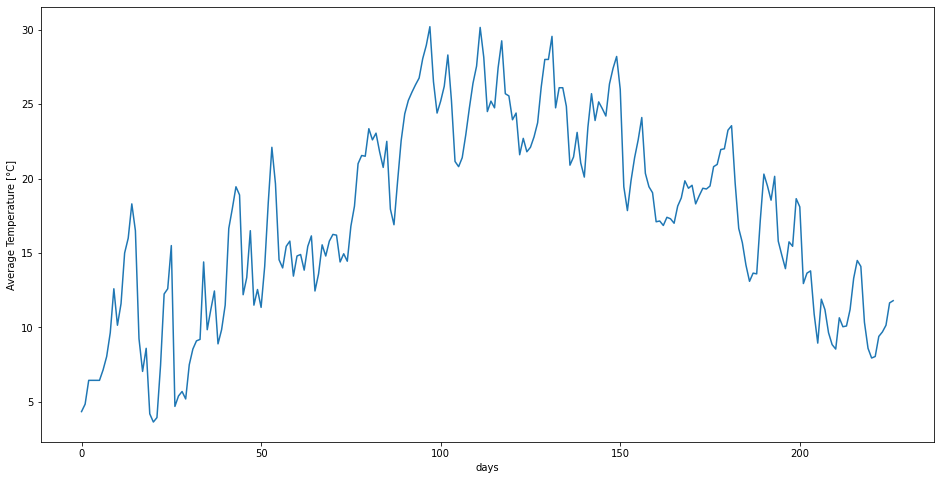

In [ ]:
# Let's extract all the data we can get
# We will load all weather data into a list (datas)
datas = []
# Weather data from 2021.03 t 2021.10 (that's all I have)
urls = [
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-03',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-04',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-05',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-06',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-07',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-08',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-09',
    'https://www.metnet.hu/napi-adatok?sub=4&pid=15320&date=2021-10'
]
# Extract the datas
for url in urls:
    data = getData(getLines(url))
    for T in data: datas.append(T)
# Visualize the database
print("number of days:",len(datas))
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("Average Temperature [°C]")
plt.plot(datas)

In [ ]:
# Save as csv
import pandas as pd
df = pd.DataFrame({'Tavg': datas})
df.to_csv('datas.csv', index=False, header=False)